In [16]:
import cmocean.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from netCDF4 import Dataset
from sklearn.decomposition import PCA
import pandas as pd

from salishsea_tools import viz_tools

In [24]:
phys = xr.open_dataset('/ocean/cstang/SalishSeaCast daily salinity_test_20210101_20220101.nc')

data = np.array(phys.vosaline)
t1 = np.array(data[0][0])
t2 = data[1][0]
avgt = np.zeros_like(t1)
print(avgt)

phys

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<xarray.Dataset>
Dimensions:   (time: 366, depth: 1, gridY: 898, gridX: 398)
Coordinates:
  * time      (time) datetime64[ns] 2021-01-01T12:00:00 ... 2022-01-01T12:00:00
  * depth     (depth) float32 76.59
  * gridY     (gridY) int64 0 1 2 3 4 5 6 7 ... 890 891 892 893 894 895 896 897
  * gridX     (gridX) int64 0 1 2 3 4 5 6 7 ... 390 391 392 393 394 395 396 397
Data variables:
    vosaline  (time, depth, gridY, gridX) float32 nan nan nan ... nan nan nan
Attributes:
    name:         SalishSeaCast daily salinity_test_20210101_20220101
    description:  Daily extracted from SalishSeaCast v201905 hindcast
    history:      2022-11-12 14:34 -08:00: Generated by `reshapr extract /oce...
    Conventions:  CF-1.6

<xarray.Dataset>
Dimensions:   (time: 366, depth: 1, gridY: 898, gridX: 398)
Coordinates:
  * time      (time) datetime64[ns] 2021-01-01T12:00:00 ... 2022-01-01T12:00:00
  * depth     (depth) float32 76.59
  * gridY     (gridY) int64 0 1 2 3 4 5 6 7 ... 890 891 892 893 894 895 896 897
  * gridX     (gridX) int64 0 1 2 3 4 5 6 7 ... 390 391 392 393 394 395 396 397
Data variables:
    vosaline  (time, depth, gridY, gridX) float32 nan nan nan ... nan nan nan
Attributes:
    name:         SalishSeaCast daily salinity_test_20210101_20220101
    description:  Daily extracted from SalishSeaCast v201905 hindcast
    history:      2022-11-12 14:34 -08:00: Generated by `reshapr extract /oce...
    Conventions:  CF-1.6

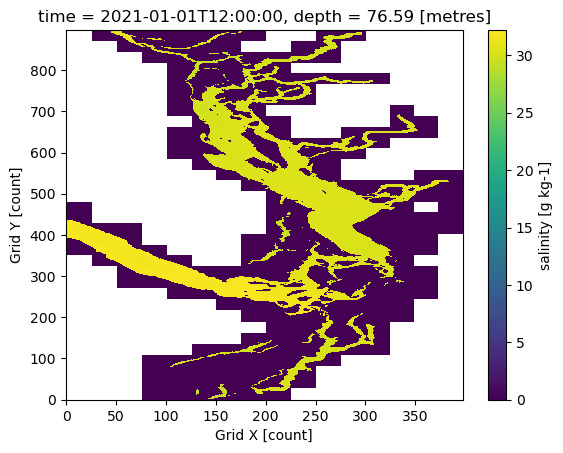

In [25]:
phys.vosaline[0, 0].plot();
phys

In [26]:
#Importing data and getting rid of the 4th dimension (which is just 1 depth)

data = Dataset('/ocean/cstang/SalishSeaCast daily salinity_test_20210101_20220101.nc')
Salinity = data.variables['vosaline']
Sal_dep = Salinity[:,0,:,:]
print(Sal_dep.shape)

(366, 898, 398)


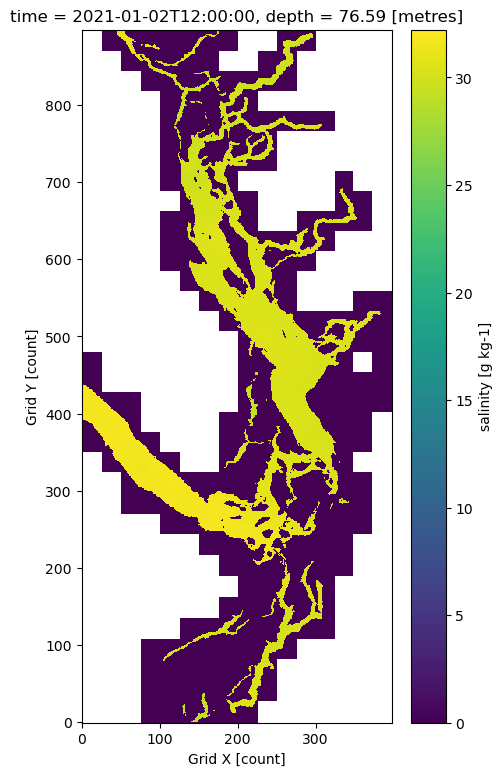

In [27]:
# set up a proper set of axes and chose a better size
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
phys.vosaline[1, 0].plot(ax=ax);
# fix the aspect ratio
#viz_tools.set_aspect(ax);


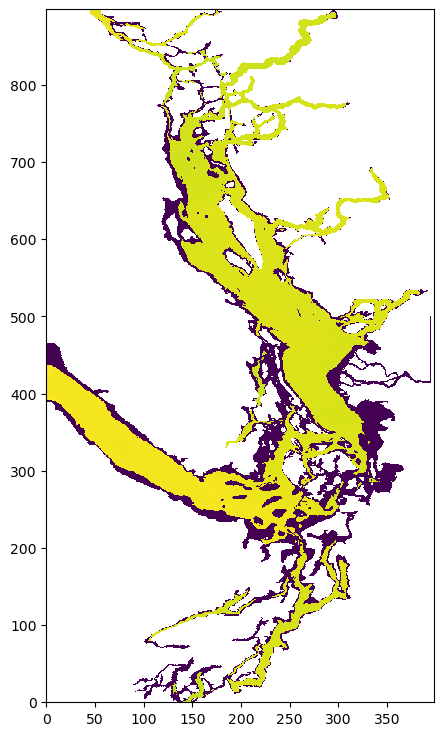

In [28]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
salinity = np.ma.masked_array(phys.vosaline[1, 0], mask=tmask[0])
ax.pcolormesh(salinity)

(898, 398)
(898, 398)


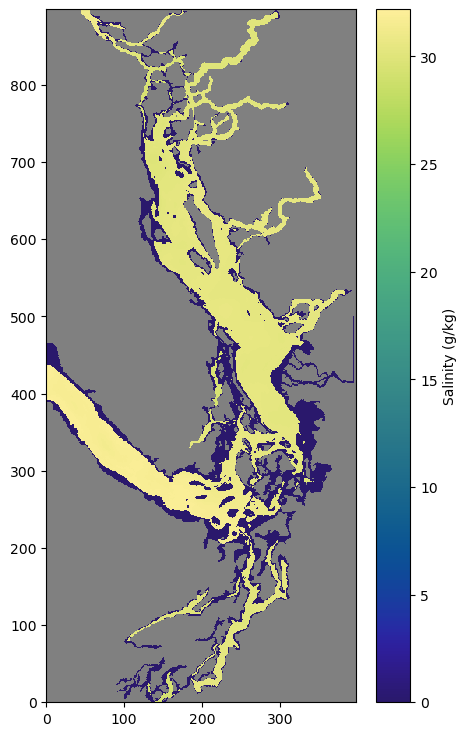

In [29]:

# note that switching to pcolormesh from xarray we lost our colorbar and our title
# Here I will also improve the colormap
cmap = cm.haline
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
salinity = np.ma.masked_array(phys.vosaline[0, 0], mask=tmask[0])
print(salinity.shape)
#Remove the 0's
info = np.ma.masked_array(phys.vosaline[300, 0], mask=tmask[0])
print(info.shape)

#Change 0's to the same -- as masked array

for i in range(len(info[:,0])):
    for j in range(len(info[0,:])):
        if info[i,j] == 0:
            info[i,j] = np.nan
            
            
#Add a title      

colours = ax.pcolormesh(salinity, cmap=cmap)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('Salinity (g/kg)')
#viz_tools.set_aspect(ax);



In [30]:
#Importing data and getting rid of the 4th dimension (which is just 1 depth)

data = Dataset('/ocean/cstang/SalishSeaCast daily salinity_test_20210101_20220101.nc')
Salinity = data.variables['vosaline']
Sal_dep = Salinity[:,0,:,:]
print(Sal_dep.shape)
# open the mesh mask and use it to mask the land
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]
#What is this tmask thing?????


info = np.ma.masked_array(phys.vosaline[0, 0], mask=tmask[0])
info2 = np.ma.masked_array(phys.vosaline[90, 0], mask=tmask[0])
info3 = np.ma.masked_array(phys.vosaline[180, 0], mask=tmask[0])
info4 = np.ma.masked_array(phys.vosaline[260, 0], mask=tmask[0])

for i in range(len(info[:,0])):
    for j in range(len(info[0,:])):
        if info[i,j] == 0:
            info[i,j] = np.nan
        if info2[i,j] == 0:
            info2[i,j] = np.nan
        if info3[i,j] == 0:
            info3[i,j] = np.nan
        if info4[i,j] == 0:
            info4[i,j] = np.nan
        

(366, 898, 398)


Text(0.5, 1.0, 'September 18th 2021')

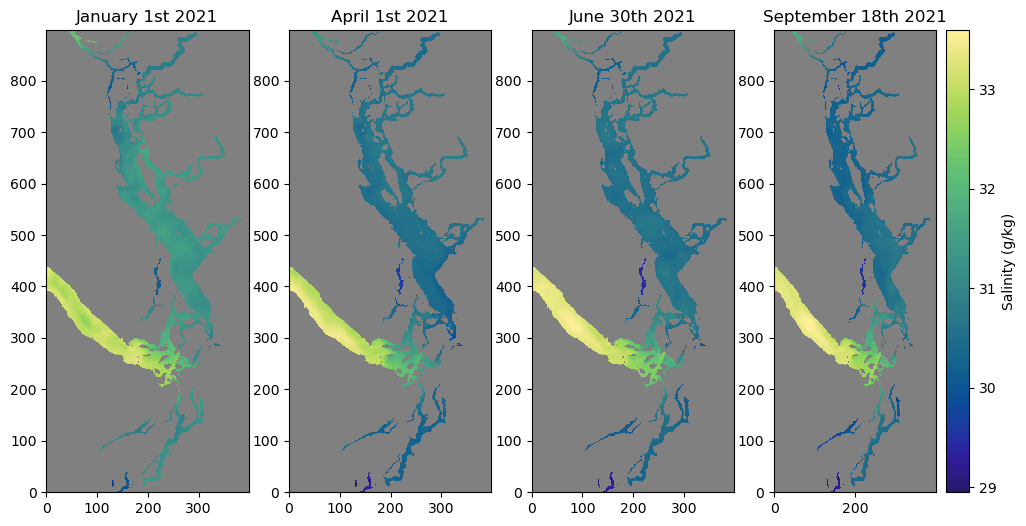

In [31]:
# open the mesh mask and use it to mask the land
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]
#What is this tmask thing?????

# note that switching to pcolormesh from xarray we lost our colorbar and our title
# Here I will also improve the colormap

cmap = cm.haline
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 4, figsize=(12, 6))
salinity = np.ma.masked_array(phys.vosaline[1, 0], mask=tmask[0])
colours = ax[0].pcolormesh(info, cmap=cmap)
# cb = fig.colorbar(colours, ax=ax[0])
# cb.set_label('Salinity (g/kg)')
colours = ax[1].pcolormesh(info2, cmap=cmap)
# cb = fig.colorbar(colours, ax=ax[1])
# cb.set_label('Salinity (g/kg)')
ax[0].set_title('January 1st 2021')
colours = ax[2].pcolormesh(info3, cmap=cmap)
# cb = fig.colorbar(colours, ax=ax[2])
# cb.set_label('Salinity (g/kg)')
colours = ax[3].pcolormesh(info4, cmap=cmap)
cb = fig.colorbar(colours, ax=ax[3])
cb.set_label('Salinity (g/kg)')
#viz_tools.set_aspect(ax);
ax[1].set_title('April 1st 2021')
ax[2].set_title('June 30th 2021')
ax[3].set_title('September 18th 2021')

In [32]:
#reformat data from 3D to 2D, where rows are grid points, columns are days

sal_70 = np.empty((np.shape(Sal_dep)[1]*np.shape(Sal_dep)[2],np.shape(Sal_dep)[0]))
for ii in range(np.shape(Sal_dep)[0]):
    sal_70[:,ii] = np.reshape(Sal_dep[ii],(np.shape(Sal_dep)[1]*np.shape(Sal_dep)[2],))
    
print(sal_70)


#This loop is reshaping the array for each time step into 1D (each time step has a 2D array - each iteration of the loop is flattening this into only rows)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [37]:
#Try making the nan's 0

sal_70[np.isnan(sal_70)] = 0
sal_70

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [57]:
pca_input_S = sal_70.T
print(sal_70[sal_70!=0].shape)
n_modes_S = 10
pca_S = PCA(n_components = n_modes_S)
PCs_S = pca_S.fit_transform(pca_input_S)
eigvecs_S = pca_S.components_
fracVar_S = pca_S.explained_variance_ratio_

print(fracVar_S)

(19302840,)
[0.73140798 0.16800907 0.03135841 0.01610629 0.00801297 0.0053671
 0.00459907 0.00387032 0.00279714 0.00226293]


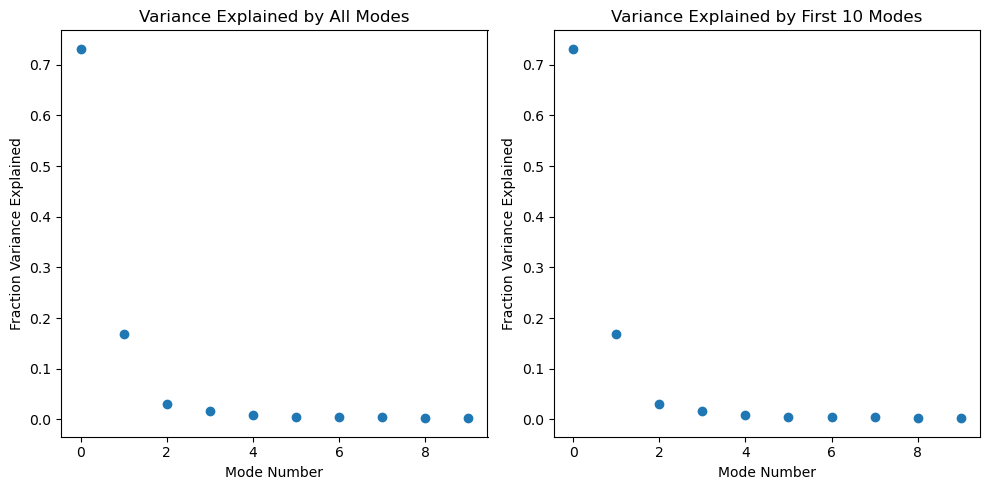

In [13]:
#plot fraction of variance explained by each mode
n_modes_show = 5

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(range(len(fracVar_S)),fracVar_S)
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by All Modes')

plt.subplot(1,2,2)
n_modes_show = 10
plt.scatter(range(n_modes_S),fracVar_S[:n_modes_S])
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by First ' + str(n_modes_show) + ' Modes')

plt.tight_layout()

plt.show()

(10, 357404)


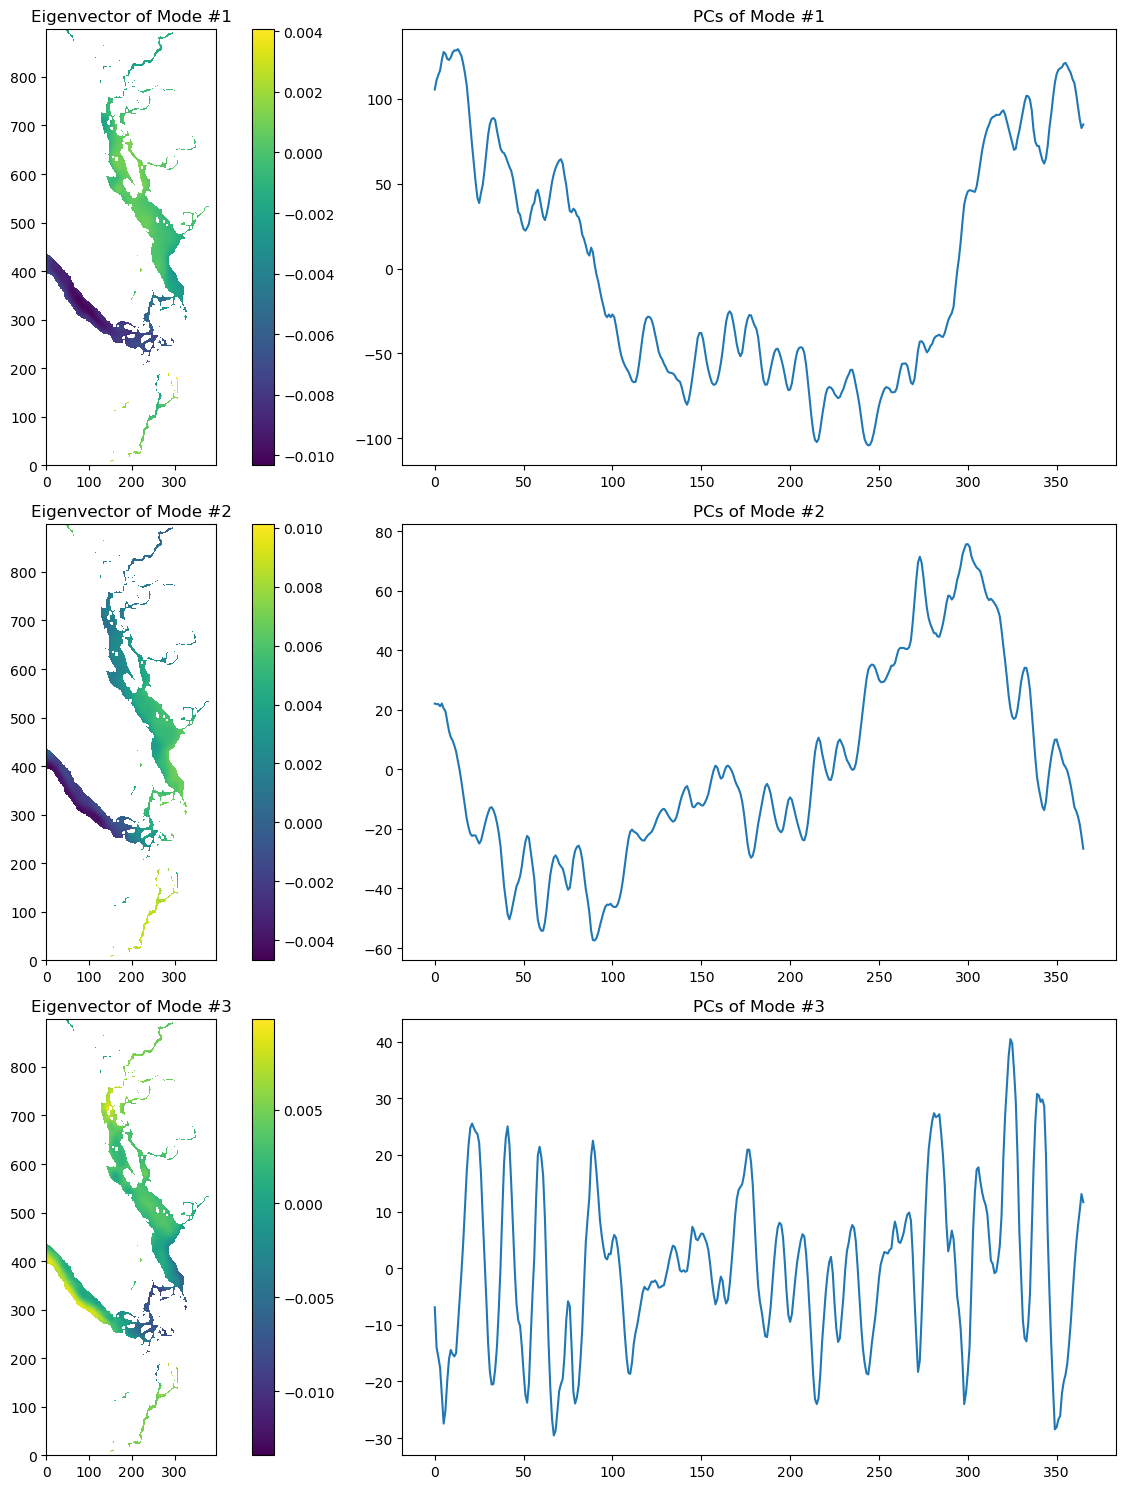

In [52]:
#plot the first n modes and PCs -- choose a value of 'n' from the variance explained figure!
eigvecs_S[eigvecs_S==0] = np.nan

n = 3
T_extent=[0,398,0,898]

#plt.figure(figsize=(15,5*n))
fig,ax = plt.subplots(3,2,figsize=(15,5*n))
print(eigvecs_S.shape)


for kk in range(n):
    
    plt.subplot(n,2,kk*2+1)
    cb = ax[kk,0].imshow(np.flipud(np.reshape(eigvecs_S[kk,:],(898,398))),extent=T_extent,cmap = 'viridis',aspect='auto')
    # plt.plot(coastLon,coastLat,c='k')
    # plt.xlim(T_extent[:2])
    # plt.ylim(T_extent[2:])
    plt.title('Eigenvector of Mode #' + str(kk+1))
    plt.colorbar(cb)
    viz_tools.set_aspect(ax[kk,0]);
    
    plt.subplot(n,2,(kk+1)*2)
    ax[kk,1].plot(PCs_S[:,kk])
    plt.title('PCs of Mode #' + str(kk+1))
    # plt.xlabel('Glacier')
    
    plt.tight_layout()

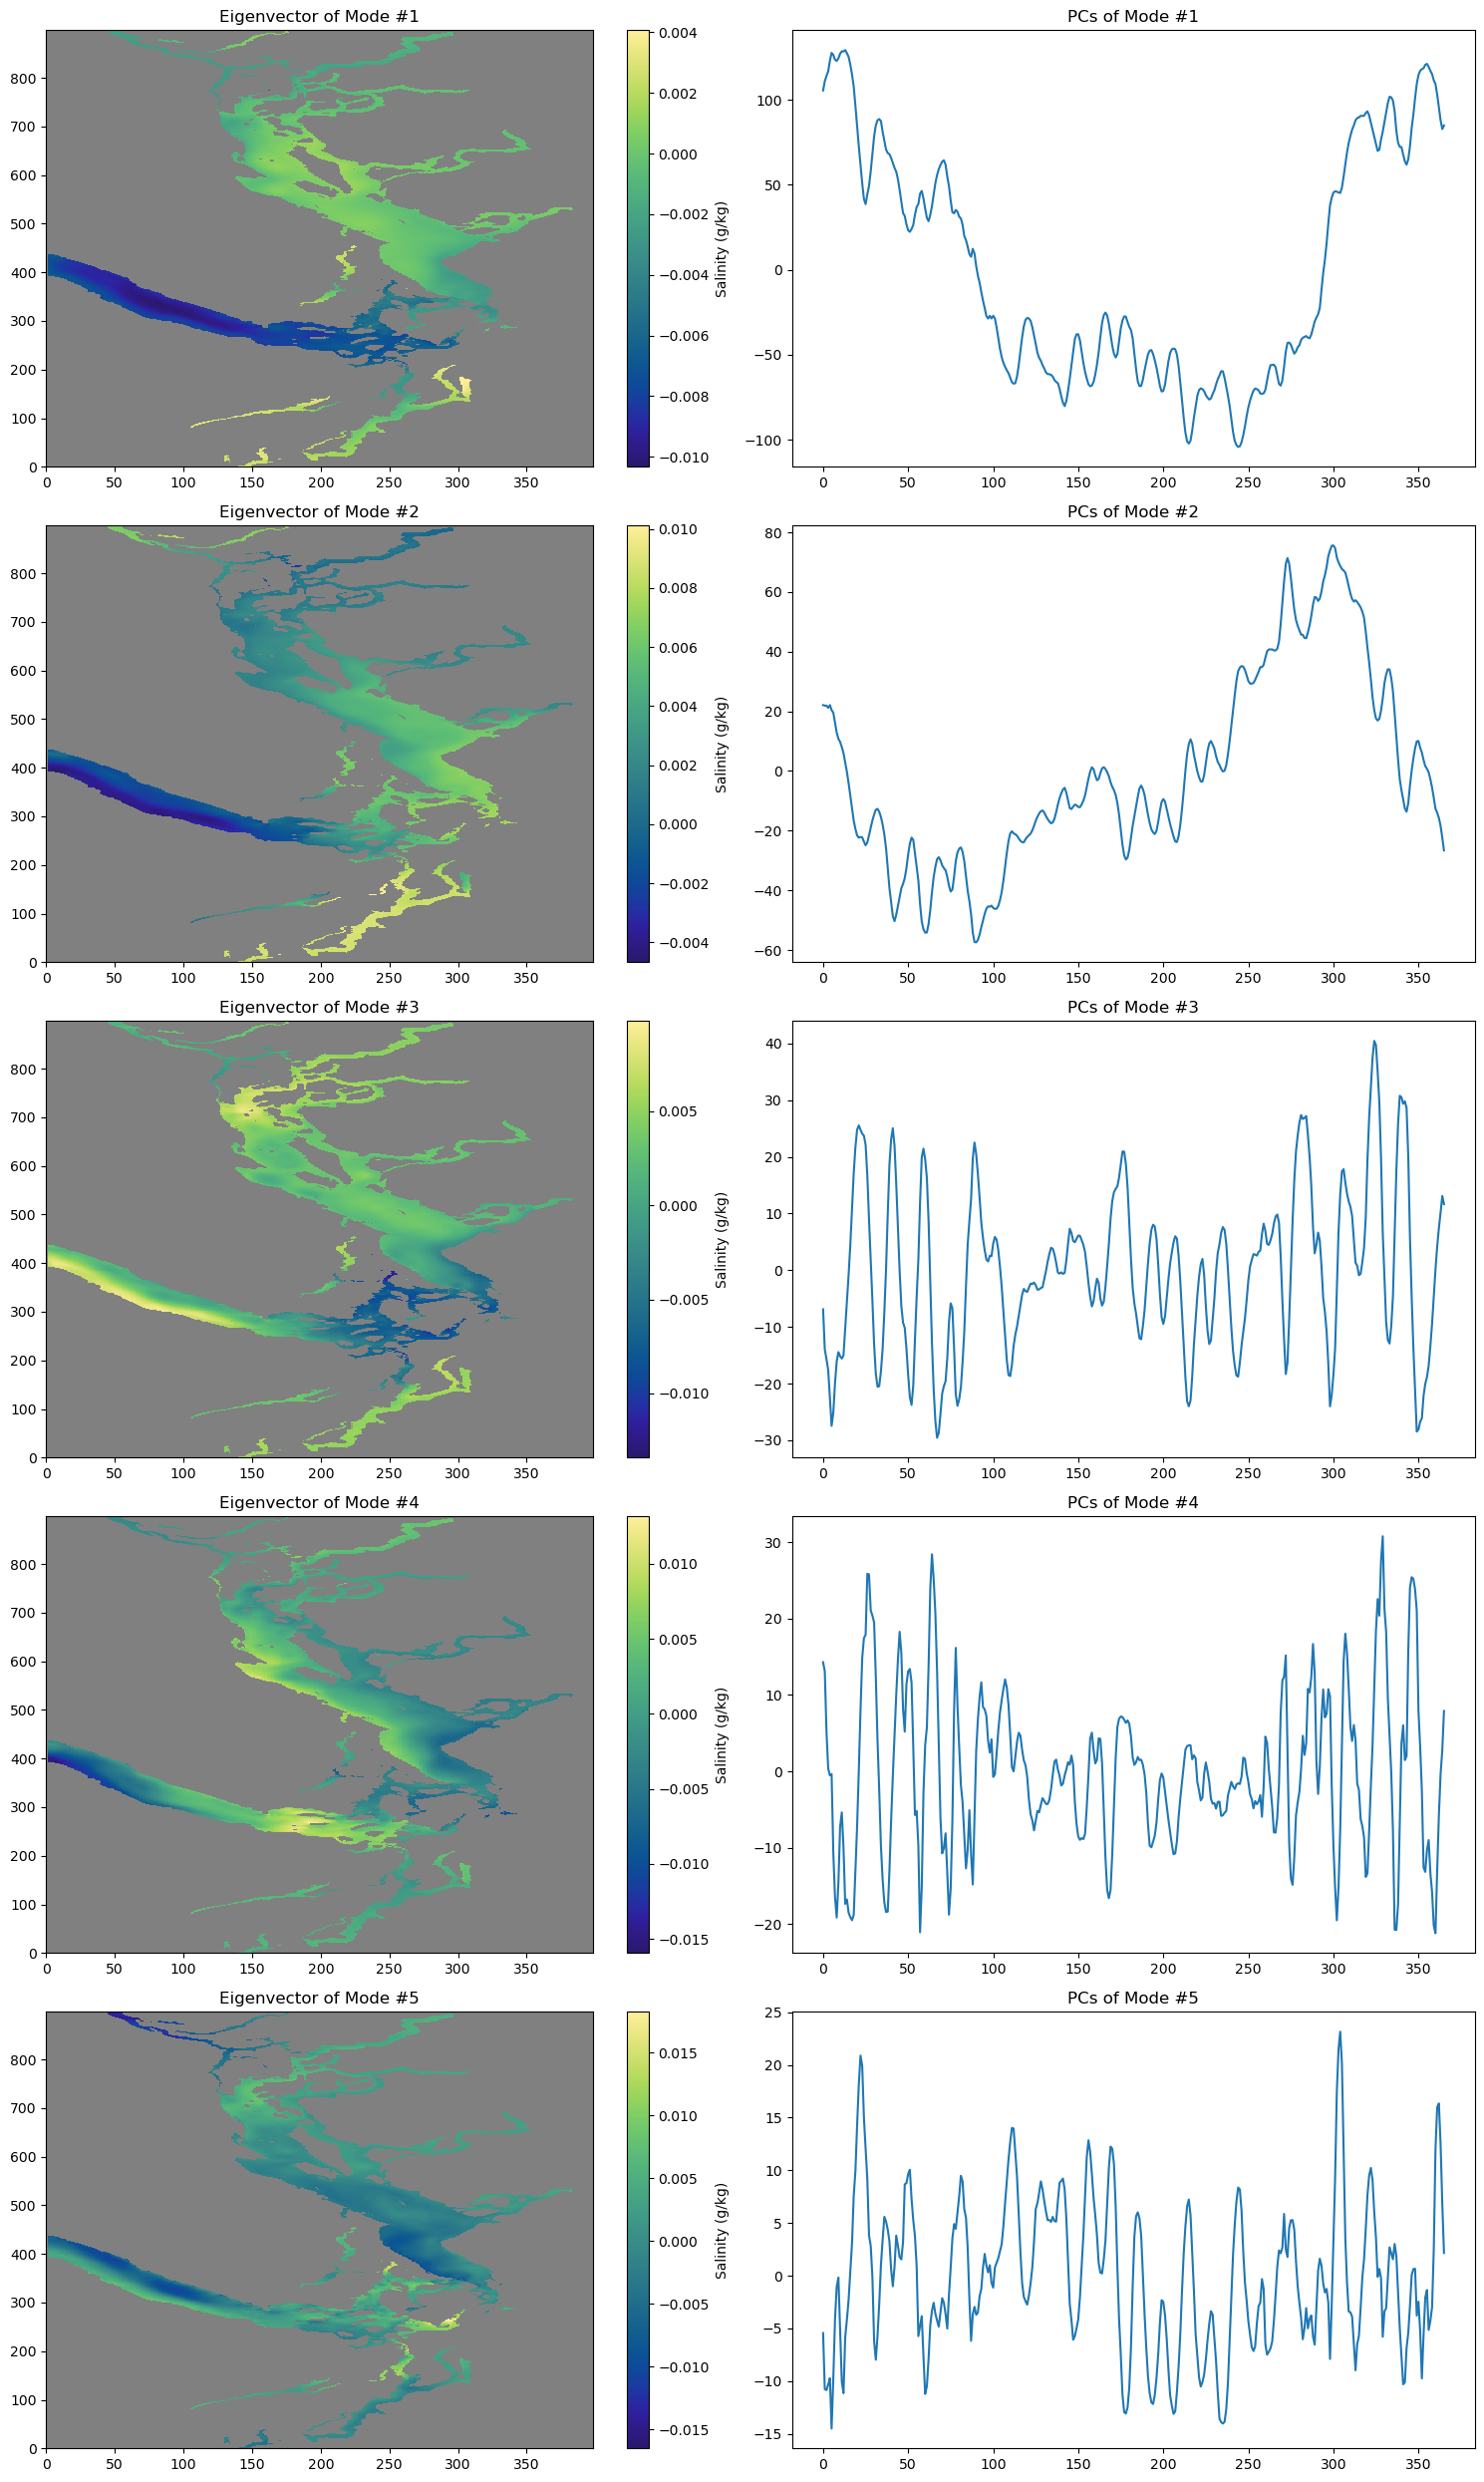

In [15]:
#plot the first n modes and PCs -- choose a value of 'n' from the variance explained figure!
eigvecs_S[eigvecs_S==0] = np.nan

n = 5
T_extent=[0,398,0,898]

plt.figure(figsize=(15,5*n))
for kk in range(n):

    plt.subplot(n,2,kk*2+1)
    cmap = cm.haline
    cmap.set_bad('gray')
    #fig, ax = plt.subplots(1, 1, figsize=(5, 9))
    salinity = np.ma.masked_array(np.reshape(eigvecs_S[kk,:],(898,398)), mask=tmask[0])
    colours = plt.pcolormesh(salinity, cmap=cmap)
    cb = plt.colorbar(colours)
    cb.set_label('Salinity (g/kg)')
    #viz_tools.set_aspect();
    #plt.imshow(np.flipud(np.reshape(eigvecs_S[kk,:],(898,398))),extent=T_extent,cmap = 'viridis',aspect='auto')
    # plt.plot(coastLon,coastLat,c='k')
    # plt.xlim(T_extent[:2])
    # plt.ylim(T_extent[2:])
    plt.title('Eigenvector of Mode #' + str(kk+1))
    #plt.colorbar()
    
    plt.subplot(n,2,(kk+1)*2)
    plt.plot(PCs_S[:,kk])
    plt.title('PCs of Mode #' + str(kk+1))
    # plt.xlabel('Glacier')
    
    plt.tight_layout()

In [17]:
%run som_class.ipynb

In [34]:

sal_70[sal_70==0] = np.nan
sal_70


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [58]:
#run SOM -- this code creates/trains the SOM and calculates stats of interest -- can take a couple minutes

#make and train the self-organizing map

N = len(sal_70) #number of observations to use as input to SOM
obs = np.array(sal_70)[-N:].T
print(obs.shape)
print(sal_70.shape)


# here is for 1x2 SOM (Nx=1, Ny=2):
Nx = 2
Ny = 2
N_nodes = Nx*Ny # number of nodes in SOM
N_obs = np.shape(obs)[0] #number of observations 
N_dims = np.shape(obs)[1] #number of dimensions per observation
learning_rate = 1e-2
N_epochs = 100
colours_list = 'pink_blue_red_purple'
colours_list = 'pinks'
colours_list = 'default2'

#initialize
som = SOM(Nx, Ny, obs, N_epochs, linewidth = 4, colours_list = colours_list)
som.initialize_map(node_shape = 'rect')

#train
som.train_map(learning_rate)
z = som.z #this is the pattern of each BMU
z_epochs = som.z_epochs #this is the pattern of each BMU through training (each epoch)
bmus = BMUs(som) #bmu of each observation
freq = BMU_frequency(som) #frequency of each bmu
_,bmus_colours = colourmap_2D(colours_list = colours_list, Nx = Nx, Ny = Ny) #colours of each bmu, for plotting
QE = som.QE() #quantization error of map
TE = som.TE() #topographic error of map


(366, 357404)
(357404, 366)


In [45]:
QE, TE
z.shape


(4, 357404)

0 AxesSubplot(0.125,0.53;0.352273x0.35)
1 AxesSubplot(0.547727,0.53;0.352273x0.35)
2 AxesSubplot(0.125,0.11;0.352273x0.35)
3 AxesSubplot(0.547727,0.11;0.352273x0.35)


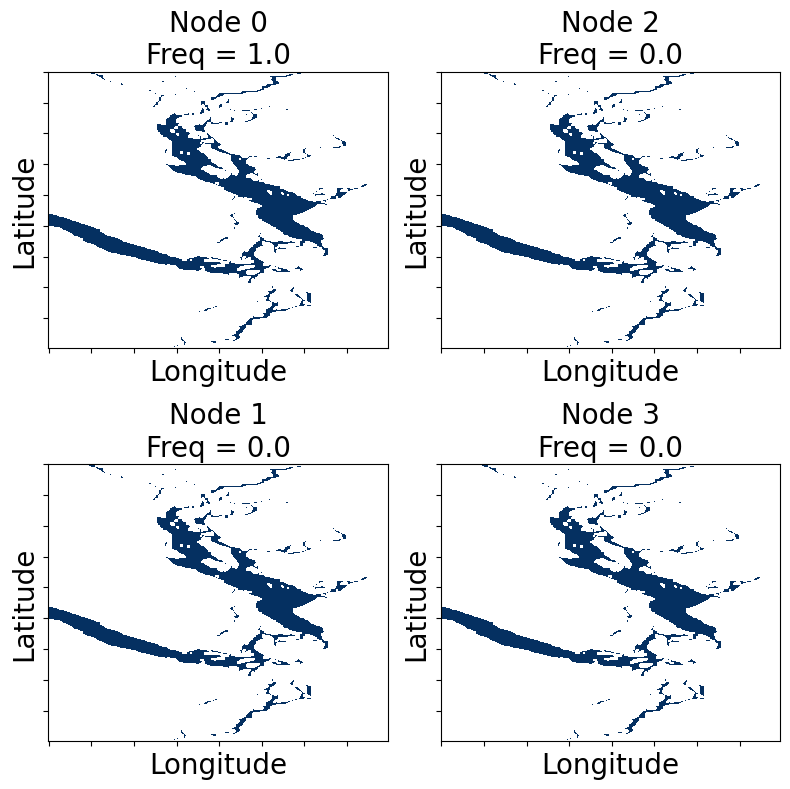

In [49]:
#visualize BMU patterns as images


indices = np.arange(N_nodes).reshape(Nx,Ny).T.flatten()
_,bmus_colours = colourmap_2D(colours_list = som.colours_list, Nx = Nx, Ny = Ny)

fig, axes = plt.subplots(nrows = Ny, ncols = Nx, figsize = (4*Nx, 4*Ny))

vmin = np.min(z)
vmax = np.max(z)

for kk, ax in enumerate(axes.flatten()): #for each axis (subplot)
    print(kk,ax)
    var = np.flipud(z[indices[kk],:].reshape(898,398))
    ax.imshow(var, cmap = 'RdBu_r', aspect = 'auto', vmin = vmin, vmax = vmax)
    ax.set_title('Node ' + str(indices[kk]) + '\nFreq = ' + str(np.round(BMU_frequency(som)[indices[kk]], decimals = 2)), fontsize = 20)
    ax.set_xlabel('Longitude', fontsize = 20)
    ax.set_ylabel('Latitude', fontsize = 20)
    ax.tick_params(labelbottom=False, labelleft=False)
plt.tight_layout()